In [1]:
import plotly.express as px
import pandas as pd

import geopandas as gpd

In [2]:
synthPopGeo = gpd.read_file("../Output Files/synthPopGeo.geojson")

In [3]:
synthPopGeo["Taxes_Delta sum"] = -1 * synthPopGeo["Taxes_Delta sum"]
synthPopGeo["Taxes_Delta mean"] = -1 * synthPopGeo["Taxes_Delta mean"]
synthPopGeo["Delta (% Income) mean"] = -1 * synthPopGeo["Delta (% Income) mean"]

In [4]:
import matplotlib.pyplot as plt

In [5]:
sub = synthPopGeo[synthPopGeo['Region mode'].isin([18, 19, 20, 21, 22])]

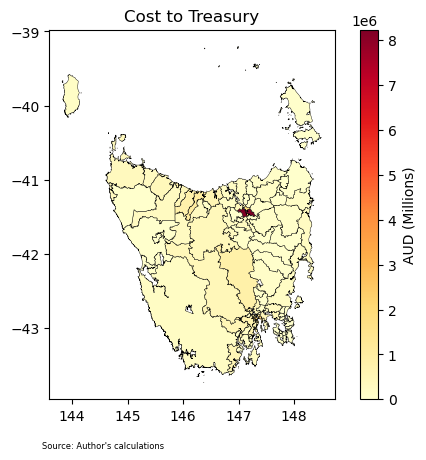

In [6]:
sub.plot(column = "Taxes_Delta sum", legend=True, legend_kwds={'label': "AUD (Millions)", 'orientation': "vertical"}, cmap= 'YlOrRd', edgecolor = "black", linewidth=0.3)
plt.title('Cost to Treasury')
plt.annotate('Source: Author\'s calculations', (0,0), (-5,-30), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('../Output Files/Figures/costTasmania.png', dpi=600, bbox_inches='tight')

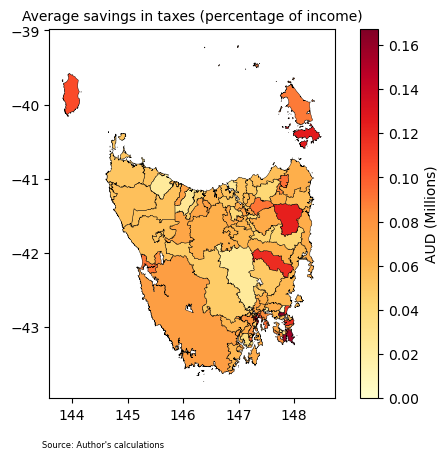

In [7]:
sub.plot(column = "Delta (% Income) mean", legend=True, legend_kwds={'label': "AUD (Millions)", 'orientation': "vertical"}, cmap= 'YlOrRd', edgecolor = "black", linewidth=0.3)
plt.title('Average savings in taxes (percentage of income)', fontsize=10)
plt.annotate('Source: Author\'s calculations', (0,0), (-5,-30), fontsize=6, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('../Output Files/Figures/savingsTasmania.png', dpi=600, bbox_inches='tight')

In [8]:
import folium as fl

In [17]:
states = {
    'ACT' : [0],
    'NSW' : [1, 2, 3, 4, 5],
    'NT' : [6, 7, 8],
    'QLD' : [9, 10, 11, 12, 13],
    'SA' : [14, 15, 16, 17],
    'TAS' : [18, 19, 20, 21, 22],
    'VIC' : [23, 24, 25, 26, 27],
    'WA' : [28, 29, 30, 31, 32]
}

In [19]:
synthPopGeo.head()

,Postal,age_range mean,Gender mean,Region mode,Taxable_Income mean,Occ_code mode,Postal count,Taxes_2022 mean,Taxes_2024 mean,Taxes_Delta mean,Taxes_Delta sum,Delta (% Income) mean,POA_CODE21,geometry
0,800,6.723128,0.489787,6,83174.348422,2,4847,19092.129583,18740.800537,351.329045,1.702892e+06,0.171163,800.0,"POLYGON ((130.83681 -12.45376, 130.83684 -12.4..."
1,810,6.304003,0.473830,6,83481.767620,2,18036,19297.022033,18983.797248,313.224785,5.649322e+06,0.149882,810.0,"POLYGON ((130.89986 -12.36567, 130.89875 -12.3..."
2,812,5.855100,0.463525,6,83288.292381,2,9020,19317.491321,19029.938475,287.552846,2.593727e+06,0.138593,812.0,"POLYGON ((130.91915 -12.40786, 130.91831 -12.4..."
3,820,6.351356,0.476543,6,87930.650851,2,12022,20765.629630,20398.102146,367.527484,4.418415e+06,0.177649,820.0,"POLYGON ((130.85260 -12.43994, 130.85089 -12.4..."
4,822,6.109431,0.462702,8,64493.140373,2,5885,12911.901586,12757.094458,154.807127,9.110399e+05,0.085416,822.0,"MULTIPOLYGON (((136.56648 -12.08392, 136.56704..."


In [55]:
html_body = ""

In [63]:
for quant in ["mean", "sum"]:
    html_body = html_body + f"\n<h2>{quant} of differences in taxes paid (State)</h2>"
    for state in states.keys():
        m = fl.Map(location=[-25.214579, 133.306451], zoom_start=3)

        sub = synthPopGeo[synthPopGeo["Region mode"].isin(states[state])]

        fl.Choropleth(
            geo_data=sub[["Postal", "geometry"]].to_json(),
            data=sub,
            columns=["Postal", f"Taxes_Delta {quant}"],
            key_on="feature.properties.Postal",
            fill_color="PuRd",
            fill_opacity=0.6,
            line_opacity=0.7,
            legend_name=f"Taxes_Delta {quant}",
        ).add_to(m)

        filename = f"taxes_delta_{quant}_{state}.html"
        m.save(f"../Docs/{filename}")

        html_body = html_body + f"\n<p><a href=\"./{filename}\">{state}</a></p>"